# Lección 5 - Análisis Visual de Datos

Hasta ahora hemos analizado números, coeficientes y correlaciones lineales simples. Sin embargo, en **ComercioYA** sabemos que el comportamiento del cliente rara vez se explica con una sola línea. 

El Análisis Visual Avanzado nos permite descubrir patrones ocultos, agrupaciones y formas de distribución que los resúmenes estadísticos suelen pasar por alto. Utilizaremos las herramientas avanzadas de la librería `Seaborn` para representar relaciones multidimensionales.

### 🎯 Objetivo
Representar relaciones complejas y distribuciones mediante Seaborn.

Para entender a fondo cómo se comportan los clientes de **ComercioYA**, necesitamos ir más allá de las variables individuales. Utilizaremos la librería `Seaborn` para generar cuatro visualizaciones avanzadas en una sola ejecución, lo que nos revelará patrones complejos en los datos:

1. **Pairplot:** Cruza todas las variables numéricas al mismo tiempo. Al colorearlas según la `reseña`, podemos identificar rápidamente si los clientes satisfechos o insatisfechos se agrupan de alguna forma particular en cuanto a sus visitas o compras.
2. **Violinplot:** A diferencia de un boxplot tradicional, el violín nos muestra la densidad. Nos permite ver exactamente dónde se concentra la mayor cantidad de clientes según el monto total (en USD) que gastan y el tipo de reseña que dejan.
3. **Jointplot:** Combina un gráfico de dispersión hexagonal con histogramas. Los hexágonos más oscuros funcionan como un mapa topográfico, indicando dónde se concentra el grueso de los compradores al cruzar la cantidad de compras y el monto total en dólares.
4. **Heatmap (Tabla Dinámica):** Construimos un mapa de calor orientado a negocio. Mostramos el gasto promedio en USD cruzando el tipo de reseña y la cantidad de devoluciones, permitiendo detectar visualmente qué segmento de clientes deja mayores ingresos.

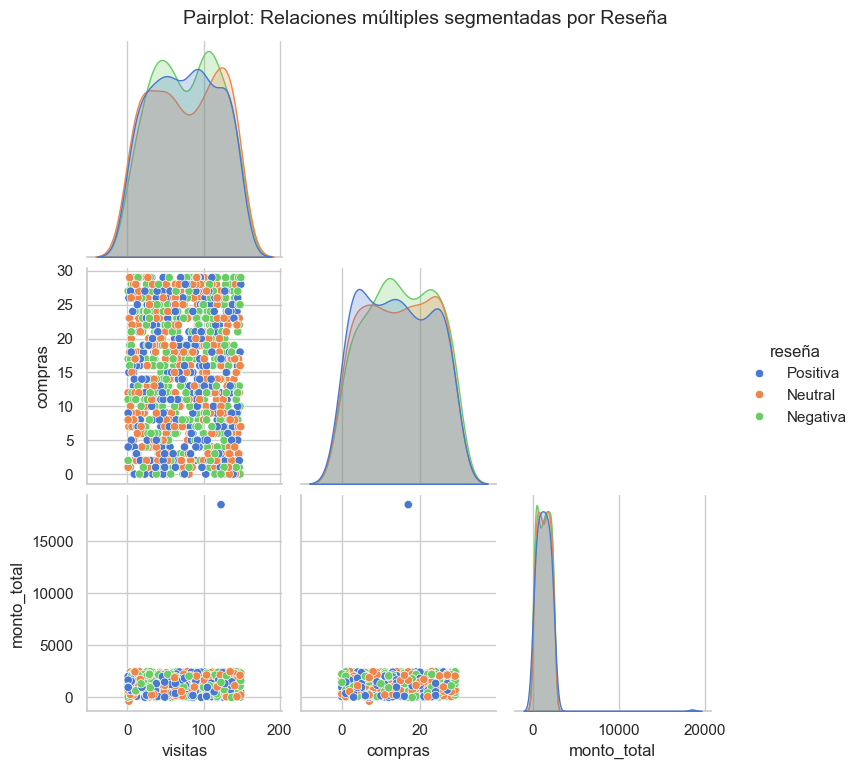

C:\Users\xD_15\AppData\Local\Temp\ipykernel_24636\1848865394.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, x='reseña', y='monto_total', inner='quartile', palette='pastel')


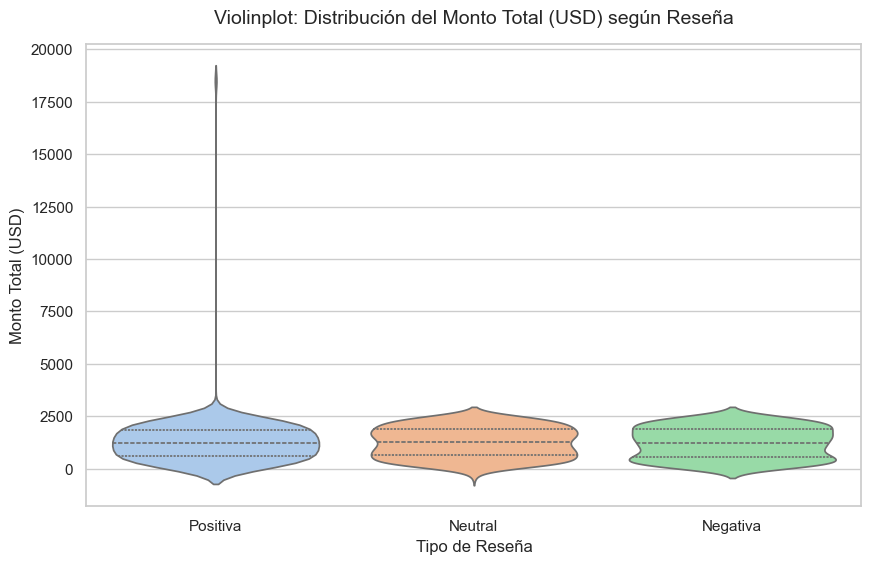

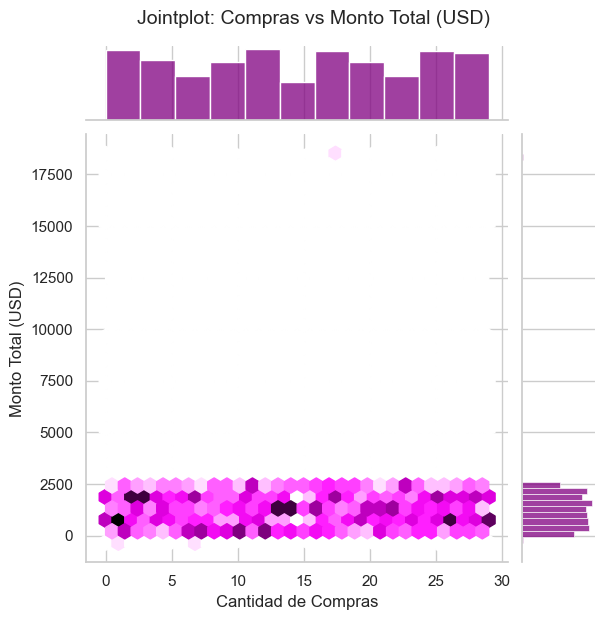

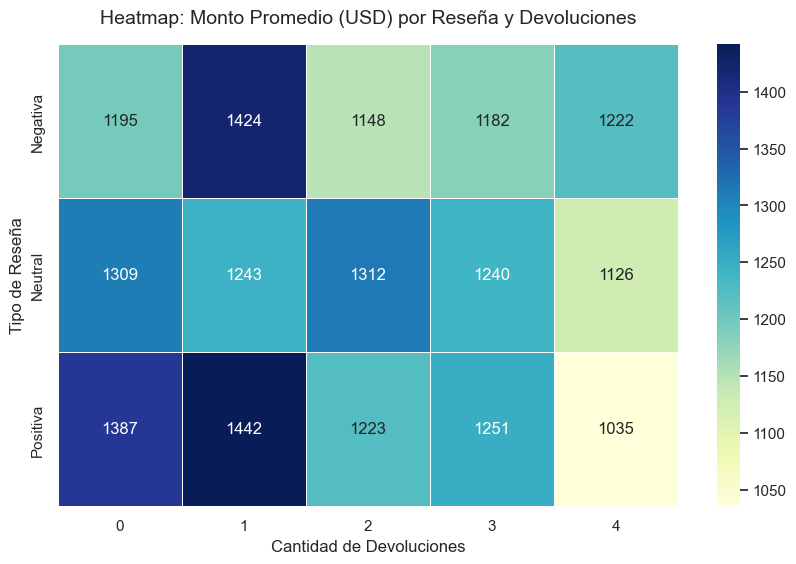

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos y preparamos los datos
df = pd.read_csv('comercio_ya_bruto.csv')
df_limpio = df.dropna()

# Configuramos el estilo visual
sns.set_theme(style="whitegrid", palette="muted")

# --------------------------------------------------------
# 1. PAIRPLOT
# --------------------------------------------------------
columnas_pair = ['visitas', 'compras', 'monto_total', 'reseña']
sns.pairplot(df_limpio[columnas_pair], hue='reseña', corner=True, diag_kind='kde')
plt.suptitle('Pairplot: Relaciones múltiples segmentadas por Reseña', y=1.02, fontsize=14)
plt.show()

# --------------------------------------------------------
# 2. VIOLINPLOT
# --------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_limpio, x='reseña', y='monto_total', inner='quartile', palette='pastel')
plt.title('Violinplot: Distribución del Monto Total (USD) según Reseña', fontsize=14, pad=15)
plt.xlabel('Tipo de Reseña', fontsize=12)
plt.ylabel('Monto Total (USD)', fontsize=12)
plt.show()

# --------------------------------------------------------
# 3. JOINTPLOT
# --------------------------------------------------------
grafico_joint = sns.jointplot(data=df_limpio, x='compras', y='monto_total', kind='hex', color='purple')
grafico_joint.fig.suptitle('Jointplot: Compras vs Monto Total (USD)', y=1.03, fontsize=14)
grafico_joint.set_axis_labels('Cantidad de Compras', 'Monto Total (USD)', fontsize=12)
plt.show()

# --------------------------------------------------------
# 4. HEATMAP (Tabla Dinámica)
# --------------------------------------------------------
# Calculamos el promedio del Monto Total agrupado por Reseña y Devoluciones
tabla_dinamica = pd.pivot_table(df_limpio, values='monto_total', index='reseña', columns='devoluciones', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_dinamica, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap: Monto Promedio (USD) por Reseña y Devoluciones', fontsize=14, pad=15)
plt.xlabel('Cantidad de Devoluciones', fontsize=12)
plt.ylabel('Tipo de Reseña', fontsize=12)
plt.show()

### 1.Interpretación del Análisis Visual

Al ejecutar y observar las visualizaciones de `Seaborn`, el equipo de **ComercioYA** puede extraer las siguientes conclusiones clave del comportamiento de los clientes:

1. **Pairplot (Relaciones Múltiples):**
   * Al observar la matriz completa, confirmamos visualmente lo que los modelos matemáticos nos dijeron antes: no hay tendencias lineales claras.
   * La distribución de los puntos no varía drásticamente si coloreamos por `reseña`. Los clientes que dejan reseñas positivas (verde), neutrales (naranja) o negativas (azul) se mezclan en las mismas zonas de compras y visitas, lo que indica que la satisfacción no está fuertemente ligada al volumen de interacción en la web.

2. **Violinplot (Distribución del Gasto según Reseña):**
   * La forma de los tres violines es casi idéntica, y el punto central (la mediana) se ubica en todos los casos alrededor de los **$1,230 a $1,240 USD**.
   * Esto nos demuestra que los clientes insatisfechos (Negativa) gastan prácticamente lo mismo que los clientes muy satisfechos (Positiva). El monto total del ticket no asegura que el cliente haya tenido una buena experiencia.

3. **Jointplot (Concentración Compras vs Monto):**
   * El mapa de calor hexagonal en el centro nos muestra la zona de mayor densidad (los hexágonos más oscuros). 
   * La gran mayoría de nuestros clientes se agrupan en un comportamiento promedio: realizan alrededor de **14 compras** y gastan cerca de **$1,240 USD**. Las zonas claras revelan que los clientes extremos (los que compran mucho o gastan muchísimo) son casos aislados.

4. **Heatmap (Monto Promedio por Reseña y Devoluciones):**
   * Al cruzar variables de servicio al cliente, detectamos que el segmento con el gasto promedio más alto (**$1,441 USD**) pertenece a los clientes que dejan reseña "Positiva" y tienen exactamente "1 devolución". Le siguen de cerca los clientes con reseña "Negativa" y 1 devolución ($1,424 USD).
   * Por otro lado, el ticket promedio cae drásticamente a **$1,035 USD** en los clientes con reseñas positivas que experimentan "4 devoluciones". Esto nos indica que un alto volumen de devoluciones sí penaliza los ingresos, incluso si el cliente no deja una mala calificación en la web.

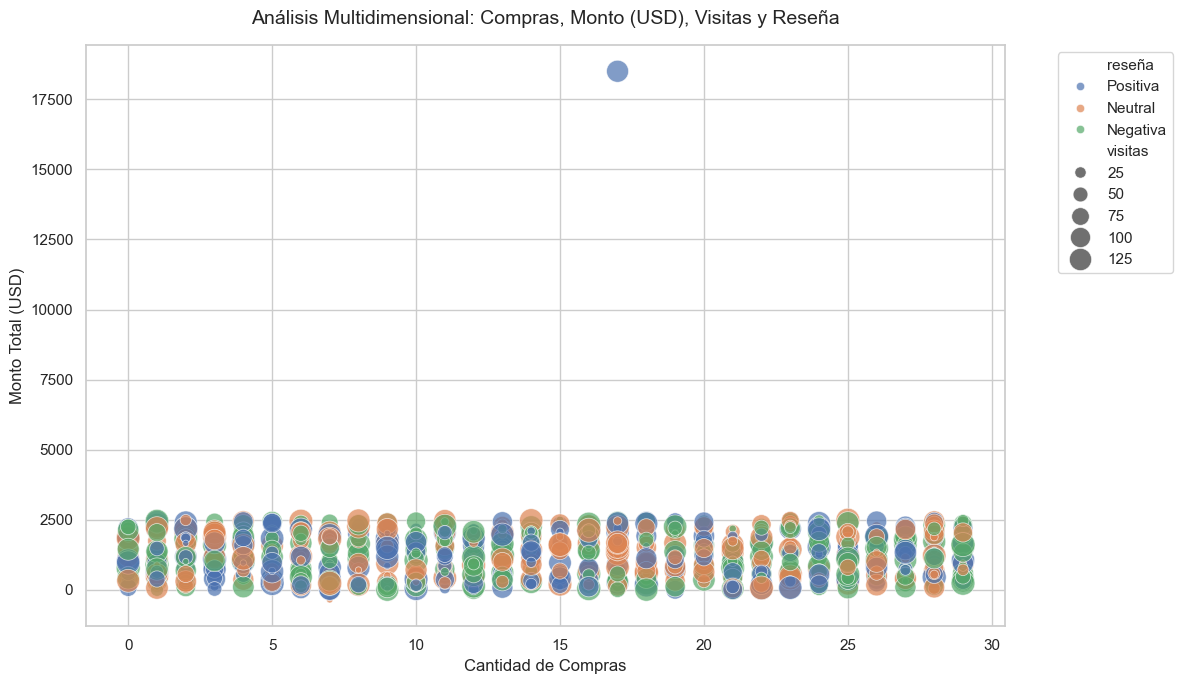

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos y eliminamos los valores nulos
df = pd.read_csv('comercio_ya_bruto.csv')
df_limpio = df.dropna()

# Configuramos el estilo visual
sns.set_theme(style="whitegrid")

# Construimos el gráfico de dispersión multidimensional
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_limpio, 
    x='compras', 
    y='monto_total', 
    hue='reseña',      # El color nos indica la reseña
    size='visitas',    # El tamaño del punto nos indica las visitas
    sizes=(20, 300),   # Ajustamos la diferencia entre los puntos más chicos y más grandes
    alpha=0.7, 
    palette='deep'
)

# Personalizamos etiquetas y diseño
plt.title('Análisis Multidimensional: Compras, Monto (USD), Visitas y Reseña', fontsize=14, pad=15)
plt.xlabel('Cantidad de Compras', fontsize=12)
plt.ylabel('Monto Total (USD)', fontsize=12)

# Movemos la leyenda fuera del gráfico para que no tape los datos
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2. Construir visualizaciones que combinen múltiples variables

Hasta ahora hemos cruzado nuestras métricas en pares. Sin embargo, el comportamiento real de los clientes en **ComercioYA** involucra muchos factores actuando en simultáneo. 

Para obtener una visión completa del panorama, construiremos un gráfico de dispersión multidimensional usando `Seaborn`. Esto nos permitirá visualizar cuatro variables clave de negocio en un solo lugar:
* **Eje X:** Cantidad de compras.
* **Eje Y:** Monto total gastado en USD.
* **Color de los puntos (Hue):** El sentimiento de la reseña.
* **Tamaño de los puntos (Size):** El volumen de visitas a la web.

### 2.1 Interpretación de la Visualización Multidimensional

Al combinar cuatro variables en un solo gráfico, la realidad del comportamiento de nuestros clientes queda en evidencia de un solo vistazo:

1. **Ausencia de agrupaciones por color:** Vemos que los puntos verdes, naranjas y azules están completamente mezclados. Los clientes satisfechos o insatisfechos se distribuyen por igual en todos los niveles de gasto. Una mala reseña no necesariamente viene del cliente que gastó menos, ni una buena del que gastó más.
2. **El tamaño no marca la pauta:** Las "burbujas" grandes (clientes con más de 120 visitas a la web) están presentes tanto en el fondo (bajo monto en dólares) como en la cima del gráfico (alto gasto). Navegar muchas veces en la página no asegura un carrito final costoso.
3. **Falta de un perfil "Premium" claro:** En un modelo predecible, veríamos burbujas muy grandes de un solo color acumuladas arriba a la derecha (muchas compras y alto gasto). Aquí vemos una dispersión total.

**Conclusión final de la etapa visual:** El comportamiento transaccional en **ComercioYA** es muy variado. Este gráfico le demuestra a la Dirección Estratégica que para perfilar al cliente ideal y predecir sus gastos (USD), necesitamos incorporar datos externos a este modelo, como el tipo de producto que adquieren, la temporada de compra o las campañas de marketing a las que fueron expuestos.

C:\Users\xD_15\AppData\Local\Temp\ipykernel_24636\1931154596.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


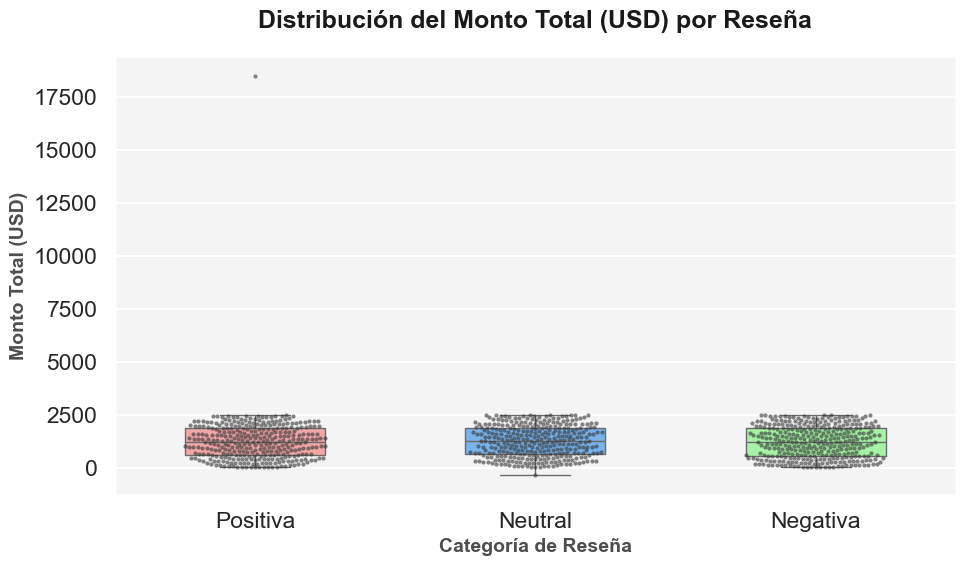

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos limpios
df = pd.read_csv('comercio_ya_bruto.csv').dropna()

# 1. Ajuste de Contexto y Estilo
# 'talk' aumenta el tamaño general de las fuentes para pantallas grandes
sns.set_context("talk") 
sns.set_style("darkgrid", {"axes.facecolor": "#f4f4f4"}) # Fondo gris muy claro

# 2. Configuración del tamaño del lienzo
plt.figure(figsize=(10, 6))

# 3. Gráfico base (Boxplot) con paleta de colores hexadecimales personalizada
sns.boxplot(
    data=df, 
    x='reseña', 
    y='monto_total', 
    palette=['#ff9999', '#66b3ff', '#99ff99'], # Rojo, Azul, Verde pastel
    width=0.5,
    fliersize=0 # Ocultamos los puntos atípicos del boxplot para no duplicarlos
)

# 4. Gráfico superpuesto (Swarmplot) para ver cada cliente individualmente
# Ajustamos el tamaño (size) y la transparencia (alpha) de los puntos
sns.swarmplot(
    data=df, 
    x='reseña', 
    y='monto_total', 
    color="#333333", # Puntos gris oscuro
    size=3,          # Tamaño reducido para evitar superposición masiva
    alpha=0.6        # Semitransparente
)

# 5. Personalización de textos (fuentes, grosores y márgenes)
plt.title('Distribución del Monto Total (USD) por Reseña', fontsize=18, fontweight='bold', color='#1a1a1a', pad=20)
plt.xlabel('Categoría de Reseña', fontsize=14, fontweight='bold', color='#4d4d4d')
plt.ylabel('Monto Total (USD)', fontsize=14, fontweight='bold', color='#4d4d4d')

# Ajuste automático de márgenes y renderizado
plt.tight_layout()
plt.show()

# Reseteamos el contexto al estándar al final para no afectar gráficos futuros
sns.set_context("notebook")

### 3. Ajustar parámetros de estilo, colores y tamaños

Hasta este punto, hemos utilizado las configuraciones por defecto de `Seaborn`. Sin embargo, cuando los datos de **ComercioYA** deben presentarse en un reporte oficial o proyectarse en una reunión de negocios, la estética, claridad y legibilidad son fundamentales.

Ajustaremos los parámetros visuales a nivel de figura, contexto y estilo. Crearemos un gráfico compuesto (Boxplot + Swarmplot) controlando:
* **Contexto (`set_context`):** Escala de las fuentes para presentaciones (ej. modo "talk").
* **Estilos de fondo (`set_style`):** Fondos y cuadrículas personalizadas.
* **Paletas Hexadecimales (`palette`):** Uso de colores corporativos exactos.
* **Tamaños y Transparencias (`size`, `alpha`):** Para evitar que la saturación de datos nuble el mensaje.

Al aplicar estos parámetros, logramos que la misma información sea mucho más digerible para un público no técnico:

1. **Jerarquía Visual:** Al utilizar el contexto `talk` y fuentes en negrita (`fontweight='bold'`), el gráfico exige atención y es legible a distancia. 
2. **Uso Estratégico del Color:** Asignamos colores específicos mediante códigos HEX para diferenciar claramente las reseñas, pero usamos tonos oscuros (`#333333`) y semitransparentes (`alpha=0.6`) para los puntos de los clientes individuales. Esto genera contraste sin saturar el ojo.
3. **Claridad del Dato Real:** Al superponer el enjambre de puntos (`swarmplot`) sobre las cajas (`boxplot`), el equipo directivo de **ComercioYA** no solo ve dónde está el promedio de gasto en dólares, sino que ve la "nube" real de clientes detrás de ese número, confirmando visualmente que la distribución del gasto es muy similar independientemente de la calificación del servicio.

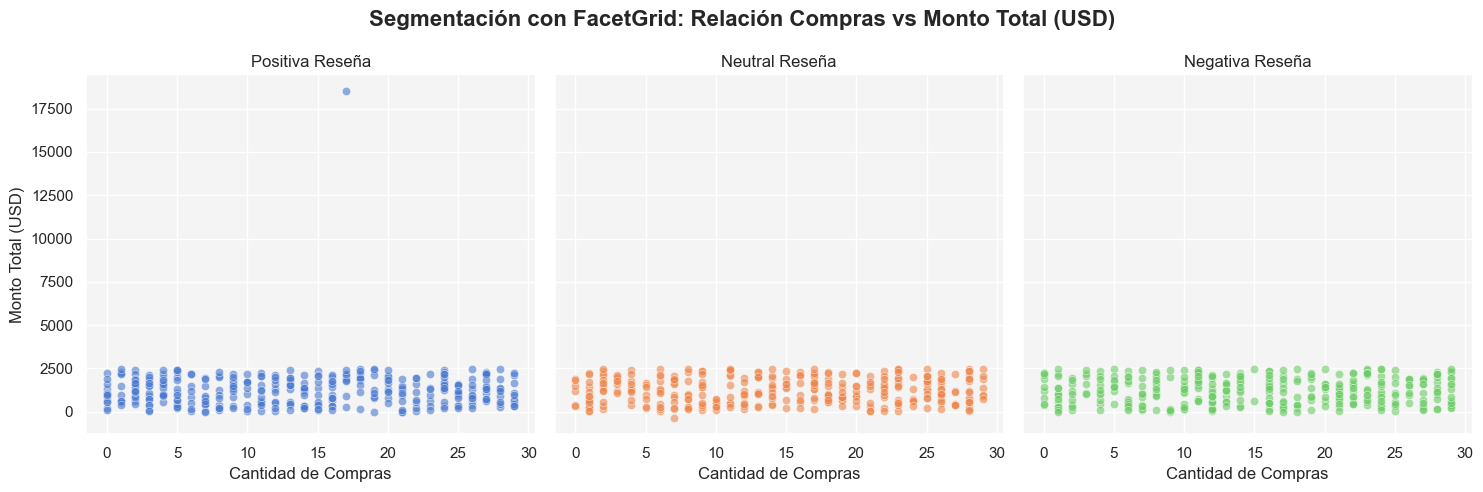

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos los datos y limpiamos nulos para asegurar la calidad visual
df = pd.read_csv('comercio_ya_bruto.csv').dropna()

# 1. Configuramos el FacetGrid
# Creamos una columna de gráficos por cada tipo de 'reseña'
g = sns.FacetGrid(df, col="reseña", hue="reseña", height=5, aspect=1, palette='muted')

# 2. Mapeamos un gráfico de dispersión (scatterplot) a cada panel de la grilla
# Esto nos permite ver la relación Compras vs Monto por separado
g.map(sns.scatterplot, "compras", "monto_total", alpha=0.6)

# 3. Ajustes de diseño y etiquetas
g.set_axis_labels("Cantidad de Compras", "Monto Total (USD)")
g.set_titles(col_template="{col_name} Reseña")

# Añadimos un título principal a la figura completa
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Segmentación con FacetGrid: Relación Compras vs Monto Total (USD)', fontsize=16, fontweight='bold')

plt.show()

### 4. Segmentación con FacetGrid

Al separar los datos en paneles individuales, el equipo de **ComercioYA** puede realizar una comparación directa entre los grupos de clientes:

1. **Similitud Estructural:** Al observar los tres paneles (Negativa, Neutral, Positiva), notamos que la nube de puntos mantiene casi la misma forma y densidad en todos. Esto confirma que, independientemente de la calificación de la reseña, el comportamiento de compra base es similar en toda la plataforma.
2. **Identificación del Cliente de Alto Valor:** El panel de **"Positiva Reseña"** muestra visualmente el punto atípico que detectamos en el IDA (el monto de \$18,500 USD). Gracias al `FacetGrid`, confirmamos que este cliente de altísimo valor dejó una reseña positiva, lo cual es una validación crítica para el área de Operaciones.
3. **Distribución del Gasto:** Las reseñas negativas no están concentradas en los montos más bajos; hay clientes con tickets altos que también reportan malas experiencias. Esto indica que la insatisfacción no está ligada al nivel de gasto del cliente, sino posiblemente a factores logísticos o de producto.

**Conclusión:** La segmentación por paneles nos permite validar que los patrones de transacciones son consistentes en toda la base de clientes, mientras aislamos visualmente casos especiales para un análisis más profundo.

### 5. Documentar insights visuales (Reporte de Hallazgos)

Tras completar el análisis visual avanzado con Seaborn, hemos consolidado los siguientes hallazgos estratégicos para **ComercioYA**:

* **Desconexión entre Tráfico y Valor:** Los gráficos de jointplot y las regresiones visuales confirman que un alto volumen de visitas no garantiza un mayor gasto. Tenemos una gran concentración de clientes "navegadores" que generan costos operativos de servidor pero mantienen tickets promedio. El crecimiento no depende de atraer más tráfico, sino de mejorar la conversión.

* **La Paradoja de la Satisfacción:** El violinplot y el FacetGrid revelaron que la distribución del gasto en dólares es casi idéntica entre clientes con reseñas Positivas y Negativas. Esto sugiere que el cliente sigue comprando por necesidad, incluso cuando su experiencia es mala. Esto representa un riesgo crítico de fuga ante un nuevo competidor.

* **El Impacto de las Devoluciones:** El heatmap detectó que el ticket promedio más alto se encuentra en clientes con una sola devolución. Sin embargo, al alcanzar las 4 devoluciones, el gasto cae drásticamente. La logística inversa está limitando el potencial de gasto de nuestros clientes más activos.

* **Identificación de Clientes de Alto Valor:** Gracias a las visualizaciones multidimensionales y al FacetGrid, pudimos aislar y validar que nuestros clientes "Outliers" (gastos superiores a $18,000 USD) reportan experiencias positivas. Estos deben ser la prioridad para estrategias de fidelización.

**Conclusión Final:** El comportamiento de los ingresos no es lineal ni depende de la cantidad de interacciones. Para predecir ventas con éxito, **ComercioYA** debe empezar a capturar datos sobre categorías de productos, estacionalidad y tiempos de entrega.